In [ ]:
!pip install -U sentence-transformers -q

In [ ]:
import pandas as pd
import numpy as np
pd.set_option('max_colwidth', None)

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial.distance import cdist
from sklearn.metrics import silhouette_score

import torch
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings('ignore')



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

reviews = pd.read_csv("/content/drive/MyDrive/news_articles.csv")


Mounted at /content/drive


In [ ]:
data = reviews.copy()

In [ ]:
data.loc[1,'Text']

'Army chiefs in regiments decision\n \n Military chiefs are expected to meet to make a final decision on the future of Scotland\'s Army regiments.\n \n A committee of the Army Board, which is made up of the most senior defence figures, will discuss plans for restructuring regiments on Monday. The proposals include cutting Scotland\'s six single-battalion regiments to five and merging these into a super regiment. The plans have faced stiff opposition from campaigners and politicians alike. The committee\'s decision must be ratified by Defence Secretary Geoff Hoon and Prime Minister Tony Blair. It is expected that it will be made public next week. When ministers announced a reorganisation of the Army it drew a question mark over the futures of the Black Watch, the Kings Own Scottish Borderers, the Royal Scots, the Royal Highland Fusiliers and the Argyll and Sutherland Highlanders. In October, the Council of Scottish Colonels proposed the merger of the Royal Scots and the King\'s Own Scot

In [ ]:
data.head()

,Text
0,"Budget to set scene for election\n \n Gordon Brown will seek to put the economy at the centre of Labour's bid for a third term in power when he delivers his ninth Budget at 1230 GMT. He is expected to stress the importance of continued economic stability, with low unemployment and interest rates. The chancellor is expected to freeze petrol duty and raise the stamp duty threshold from Â£60,000. But the Conservatives and Lib Dems insist voters face higher taxes and more means-testing under Labour.\n \n Treasury officials have said there will not be a pre-election giveaway, but Mr Brown is thought to have about Â£2bn to spare.\n \n - Increase in the stamp duty threshold from Â£60,000 \n - A freeze on petrol duty \n - An extension of tax credit scheme for poorer families \n - Possible help for pensioners The stamp duty threshold rise is intended to help first time buyers - a likely theme of all three of the main parties' general election manifestos. Ten years ago, buyers had a much greater chance of avoiding stamp duty, with close to half a million properties, in England and Wales alone, selling for less than Â£60,000. Since then, average UK property prices have more than doubled while the starting threshold for stamp duty has not increased. Tax credits As a result, the number of properties incurring stamp duty has rocketed as has the government's tax take. The Liberal Democrats unveiled their own proposals to raise the stamp duty threshold to Â£150,000 in February.\n \n The Tories are also thought likely to propose increased thresholds, with shadow chancellor Oliver Letwin branding stamp duty a ""classic Labour stealth tax"". The Tories say whatever the chancellor gives away will be clawed back in higher taxes if Labour is returned to power. Shadow Treasury chief secretary George Osborne said: ""Everyone who looks at the British economy at the moment says there has been a sharp deterioration in the public finances, that there is a black hole,"" he said. ""If Labour is elected there will be a very substantial tax increase in the Budget after the election, of the order of around Â£10bn.""\n \n But Mr Brown's former advisor Ed Balls, now a parliamentary hopeful, said an examination of Tory plans for the economy showed there would be a Â£35bn difference in investment by the end of the next parliament between the two main parties. He added: ""I don't accept there is any need for any changes to the plans we have set out to meet our spending commitments.""\n \n For the Lib Dems David Laws said: ""The chancellor will no doubt tell us today how wonderfully the economy is doing,"" he said. ""But a lot of that is built on an increase in personal and consumer debt over the last few years - that makes the economy quite vulnerable potentially if interest rates ever do have to go up in a significant way."" SNP leader Alex Salmond said his party would introduce a Â£2,000 grant for first time buyers, reduce corporation tax and introduce a citizens pension free from means testing. Plaid Cymru's economics spokesman Adam Price said he wanted help to get people on the housing ladder and an increase in the minimum wage to Â£5.60 an hour.\n"
1,"Army chiefs in regiments decision\n \n Military chiefs are expected to meet to make a final decision on the future of Scotland's Army regiments.\n \n A committee of the Army Board, which is made up of the most senior defence figures, will discuss plans for restructuring regiments on Monday. The proposals include cutting Scotland's six single-battalion regiments to five and merging these into a super regiment. The plans have faced stiff opposition from campaigners and politicians alike. The committee's decision must be ratified by Defence Secretary Geoff Hoon and Prime Minister Tony Blair. It is expected that it will be made public next week. When ministers announced a reorganisation of the Army it drew a question mark over the futures of the Black Watch, the Kings Own Scottish Borderers, the Royal Scots

In [ ]:
data.tail()

,Text
2220,"India opens skies to competition\n \n India will allow domestic commercial airlines to fly long haul international routes, a move it hopes will stoke competition and drive down prices.\n \n However, only state controlled carriers will be able to fly the lucrative Gulf routes, to countries such as Kuwait and Saudi Arabia, for at least three years. Jet Airways and Air Sahara are the two companies that will benefit initially. India is looking to develop its airline industry as booming economic growth drives demand for travel.\n \n Monica Chadha, BBC Delhi reporter, said air travel in India had increased by almost 20% from the previous year and was expected to rise even further. Infrastructure development is lagging demand, however, and will have to improve. ""Most international airports in the country are shabby and ill-equipped to handle heavy air traffic,"" Ms Chada said, adding that while the Civil Aviation minister has promised to modernise and privatise airports little progress has been made. Steps have been take to move things forward and the government recently changed legislation that limited foreign investment in domestic airlines. It raised the maximum stake holding allowed to 49% from 40%. Local press, meanwhile, have reported that the US and India will start negotiations about adding more routes in January. Jet Airways is India's premier private domestic carrier; Air Sahara is ranked third in the category.\n"
2221,"Yukos bankruptcy 'not US matter'\n \n Russian authorities do not have to abide by any US court decisions taken with regard to troubled oil giant Yukos, a Houston court has been told.\n \n Legal expert William Butler said there was no treaty between the US and Russia to recognise the other's legal rulings. That meant Moscow would not have to adhere to US rulings in the Yukos case. Yukos says a US court was entitled to declare it bankrupt before its Yugansk unit was sold, since it has a US subsidiary and local bank accounts.\n \n Yukos made its surprise Chapter 11 bankruptcy filing in Houston in December in an unsuccessful attempt to halt the auction of Yugansk, its main oil producing unit, by Russian authorities. Yugansk was sold to help pay off a $27.5bn (Â£14.5bn) back tax bill. It was bought for $9.4bn by a previously unknown group, which was in turn bought by state-controlled oil company Rosneft. The US court's jurisdiction has been challenged by Deutsche Bank and Gazpromneft, a former unit of Russian gas monopoly Gazprom which is due to merge with Rosneft. Deutsche Bank maintains the case has no place in a US court because Yukos has no assets in the US, apart from two bank accounts and a house in Houston owned by its chief finance officer Bruce Misamore. Deutsche Bank is involved in the case because it is itself being sued by Yukos. It had agreed to loan Gazpromneft the money to bid for Yugansk. US bankruptcy judge Letitia Clark, who issued an injunction in December to try and prevent the Yugansk sale, has said she will rule ""pretty promptly, however I do not anticipate ruling on it before next Tuesday"".\n \n Yukos has claimed it sought help in the US because other forums - Russian courts and the European Court of Human Rights - were either unfriendly or offered less protection. It has claimed that Russia imposed the huge tax bill and forced the sale of Yugansk as part of a campaign to destroy Yukos and its former owner Mihkail Khodorkovsky, who is facing a 10-year prison term in Russia for fraud and tax evasion. Yukos' parent company, the Gibraltar-based Menatep Group, is suing Russia in Europe for $28.3bn in financial damages. The company is also seeking $20bn in a separate US lawsuit against Rosneft and Gazprom for their role in the sale of Yugansk.\n"
2222,"Survey confirms property slowdown\n \n Government figures have confirmed a widely reported slowdown of the UK's housing market in late 2004.\n \n House prices were 11.8% higher on the year in the last quarter of 2004, down from 16.3

In [ ]:
data.shape

(2225, 1)

In [ ]:
data = data.drop_duplicates().reset_index(drop=True)

In [ ]:
data.duplicated().sum()

np.int64(0)

In [ ]:
data.shape

(2127, 1)

In [ ]:
!pip install hf_xet

In [ ]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('sentence-transformers/all-MiniLm-L6-v2')

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
embedding_matrix = model.encode(data['Text'],show_progress_bar=True, device = device)
embedding_matrix.shape

Batches:   0%|          | 0/67 [00:00<?, ?it/s]

(2127, 384)

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
embedding_matrix = model.encode(data['Text'],show_progress_bar=True, device = device)
embedding_matrix.shape

Batches:   0%|          | 0/67 [00:00<?, ?it/s]

(2127, 384)

In [ ]:
embedding_matrix = model.encode(data['Text'],show_progress_bar=True, device = device)

Batches:   0%|          | 0/67 [00:00<?, ?it/s]

In [ ]:
embedding_matrix.shape

(2127, 384)

In [ ]:
len(embedding_matrix[0])

384

In [ ]:
a = "i love apple"
b = "apple is a fruit"
c = "fruit is good for health"

In [ ]:
def cosine_score(text1, text2):

  embedding1 = model.encode(text1)
  embedding2 = model.encode(text2)

  norm1 = np.linalg.norm(embedding1)
  nrom2 = np.linalg.norm(embedding2)

  cosine_similarity_score = ((np.dot(embedding1, embedding2))/(norm1*nrom2))

  return cosine_similarity_score

In [ ]:
print(cosine_score(a,b))
print(cosine_score(b,c))
print(cosine_score(a,c))

0.55750245
0.63246256
0.26387835


In [ ]:
from sentence_transformers import util
embeddings1 = model.encode(a)
embeddings2 = model.encode(b)
embeddings3 = model.encode(c)

print(util.cos_sim(embeddings1, embeddings2))
print(util.cos_sim(embeddings2, embeddings3))
print(util.cos_sim(embeddings1, embeddings3))


tensor([[0.5575]])
tensor([[0.6325]])
tensor([[0.2639]])


In [ ]:
def top_k_similar_sentences(embedding_maytrix,query_text,k):
  query_embedding = model.encode(query_text)
  score_vector = np.dot(embedding_matrix,query_embedding)
  top_k_indices = np.argsort(score_vector)[::-1][:k]
  return data.loc[list(top_k_indices), 'Text']

In [ ]:
query_text = "Budget for elections"
top_k_reviews = top_k_similar_sentences(embedding_matrix, query_text, 2)

for i in top_k_reviews:
    print(i, end="\n")
    print("*******************************************************************")
    print("\n")

'Debate needed' on donations cap
 
 A cap on donations to political parties should not be introduced yet, the elections watchdog has said.
 
 Fears that big donors can buy political favours have sparked calls for a limit. In a new report, the Electoral Commission says it is worth debating a Â£10,000 cap for the future but now is not the right time to introduce it. It also says there should be more state funding for political parties and candidates should be able to spend more on election campaigning.
 
 There were almost Â£68m in reported donations to political parties in 2001, 2002 and 2003, with nearly Â£12m of them from individual gifts worth more than Â£1m. The rules have already been changed so the public can see who gives how much to the parties but the report says there are still public suspicions. The commission says capping donations would mean taxpayers giving parties more cash - something which would first have to be acceptable to the public and shown to work. "While we are 

In [ ]:
query_text = "High imports and exports"
top_k_reviews = top_k_similar_sentences(embedding_matrix, query_text, 2)

for i in top_k_reviews:
    print(i, end="\n")
    print("*******************************************************************")
    print("\n")

US trade gap ballooned in October
 
 The US trade deficit widened by more than expected in October, hitting record levels after higher oil prices raised import costs, figures have shown
 
 The trade shortfall was $55.5bn (Â£29bn), up 9% from September, the Commerce Department said. That pushed the 10 month deficit to $500.5bn. Imports rose by 3.4%, while exports increased by only 0.6%. A weaker dollar also increased the cost of imports, though this should help drive export demand in coming months. "Things are getting worse, but that's to be expected," said David Wyss of Standard & Poor's in New York. "The first thing is that when the dollar goes down, it increases the price of imports. "We are seeing improved export orders. Things seem to be going in the right direction."
 
 Despite this optimism, significant concerns remain as to how the US will fund its trade and budget deficits should they continue to widen. Another problem highlighted by analysts was the growing trade gap with Chin

In [ ]:
meanDistortions = []
clusters = range(2, 11)

for k in clusters:
    clusterer = KMeans(n_clusters=k, random_state=1)
    clusterer.fit(embedding_matrix)

    prediction = clusterer.predict(embedding_matrix)

    distortion = sum(
        np.min(cdist(embedding_matrix, clusterer.cluster_centers_, "euclidean"), axis=1) ** 2
    )
    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

Number of Clusters: 2 	Average Distortion: 1795.3091146747045
Number of Clusters: 3 	Average Distortion: 1737.2980165191386
Number of Clusters: 4 	Average Distortion: 1666.670280185686
Number of Clusters: 5 	Average Distortion: 1621.4823707705561
Number of Clusters: 6 	Average Distortion: 1591.5027285873807
Number of Clusters: 7 	Average Distortion: 1577.105400570846
Number of Clusters: 8 	Average Distortion: 1571.684353511434
Number of Clusters: 9 	Average Distortion: 1559.9432993656876
Number of Clusters: 10 	Average Distortion: 1534.399210400378


In [ ]:
meanDistortions = []
clusters = range(2, 15)
for k in clusters:
    clusterer = KMeans(n_clusters=k, random_state=1)
    clusterer.fit(embedding_matrix)
    prediction = clusterer.predict(embedding_matrix)
    distortion = sum(
        np.min(cdist(embedding_matrix, clusterer.cluster_centers_, "euclidean"), axis=1) ** 2
    )
    meanDistortions.append(distortion)
    print("Number of Clusters:",k, "\Avereage Distortion:", distortion)

Number of Clusters: 2 \Avereage Distortion: 1795.3091146747045
Number of Clusters: 3 \Avereage Distortion: 1737.2980165191386
Number of Clusters: 4 \Avereage Distortion: 1666.670280185686
Number of Clusters: 5 \Avereage Distortion: 1621.4823707705561
Number of Clusters: 6 \Avereage Distortion: 1591.5027285873807
Number of Clusters: 7 \Avereage Distortion: 1577.105400570846
Number of Clusters: 8 \Avereage Distortion: 1571.684353511434
Number of Clusters: 9 \Avereage Distortion: 1559.9432993656876
Number of Clusters: 10 \Avereage Distortion: 1534.399210400378
Number of Clusters: 11 \Avereage Distortion: 1525.5192234867177
Number of Clusters: 12 \Avereage Distortion: 1502.2302084668465
Number of Clusters: 13 \Avereage Distortion: 1489.3115129274072
Number of Clusters: 14 \Avereage Distortion: 1468.5684375896483


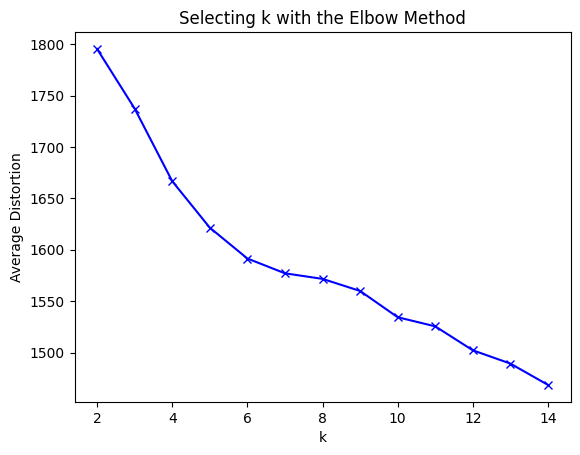

In [ ]:
plt.plot(clusters, meanDistortions,"bx-")
plt.xlabel("k")
plt.ylabel("Average Distortion")
plt.title("Selecting k with the Elbow Method")
plt.show()


In [ ]:
sil_score = []
cluster_list = range(2, 15)

for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters, random_state=1)

    preds = clusterer.fit_predict((embedding_matrix))

    score = silhouette_score(embedding_matrix, preds)
    sil_score.append(score)

    print("For n_clusters = {}, the silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, the silhouette score is 0.046811509877443314)
For n_clusters = 3, the silhouette score is 0.04964283108711243)
For n_clusters = 4, the silhouette score is 0.06065066531300545)
For n_clusters = 5, the silhouette score is 0.06735046207904816)
For n_clusters = 6, the silhouette score is 0.06096599996089935)
For n_clusters = 7, the silhouette score is 0.05802200734615326)
For n_clusters = 8, the silhouette score is 0.05344569683074951)
For n_clusters = 9, the silhouette score is 0.05067500099539757)
For n_clusters = 10, the silhouette score is 0.04589764401316643)
For n_clusters = 11, the silhouette score is 0.045464176684617996)
For n_clusters = 12, the silhouette score is 0.04745149984955788)
For n_clusters = 13, the silhouette score is 0.04870430380105972)
For n_clusters = 14, the silhouette score is 0.053557585924863815)


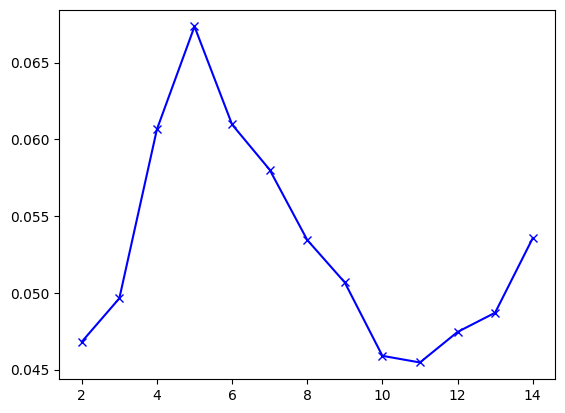

In [ ]:
plt.plot(cluster_list, sil_score, "bx-")
plt.show()

In [ ]:
n_categories = 5
kmeans = KMeans(n_clusters=n_categories, random_state=1).fit(embedding_matrix)

In [ ]:
centers = kmeans.cluster_centers_
centers

array([[-0.01785407,  0.00624583, -0.00339485, ..., -0.06009004,
        -0.03252158,  0.01114389],
       [ 0.00549149, -0.02162499,  0.01707268, ..., -0.03975475,
        -0.01703279,  0.01147507],
       [-0.01044312, -0.0430865 , -0.01626261, ..., -0.06730248,
        -0.0080532 ,  0.00465481],
       [-0.01394476, -0.03756041,  0.00739344, ..., -0.10312265,
        -0.01400104,  0.03134287],
       [-0.02824864, -0.03118991,  0.00693417, ..., -0.05258856,
         0.00538871,  0.03337956]], dtype=float32)

In [ ]:
kmeans.labels_

array([1, 1, 1, ..., 3, 3, 3], dtype=int32)

In [ ]:
clustered_data = data.copy()
clustered_data['cluster'] = kmeans.labels_
clustered_data.head()

,Text,cluster
0,"Budget to set scene for election\n \n Gordon Brown will seek to put the economy at the centre of Labour's bid for a third term in power when he delivers his ninth Budget at 1230 GMT. He is expected to stress the importance of continued economic stability, with low unemployment and interest rates. The chancellor is expected to freeze petrol duty and raise the stamp duty threshold from Â£60,000. But the Conservatives and Lib Dems insist voters face higher taxes and more means-testing under Labour.\n \n Treasury officials have said there will not be a pre-election giveaway, but Mr Brown is thought to have about Â£2bn to spare.\n \n - Increase in the stamp duty threshold from Â£60,000 \n - A freeze on petrol duty \n - An extension of tax credit scheme for poorer families \n - Possible help for pensioners The stamp duty threshold rise is intended to help first time buyers - a likely theme of all three of the main parties' general election manifestos. Ten years ago, buyers had a much greater chance of avoiding stamp duty, with close to half a million properties, in England and Wales alone, selling for less than Â£60,000. Since then, average UK property prices have more than doubled while the starting threshold for stamp duty has not increased. Tax credits As a result, the number of properties incurring stamp duty has rocketed as has the government's tax take. The Liberal Democrats unveiled their own proposals to raise the stamp duty threshold to Â£150,000 in February.\n \n The Tories are also thought likely to propose increased thresholds, with shadow chancellor Oliver Letwin branding stamp duty a ""classic Labour stealth tax"". The Tories say whatever the chancellor gives away will be clawed back in higher taxes if Labour is returned to power. Shadow Treasury chief secretary George Osborne said: ""Everyone who looks at the British economy at the moment says there has been a sharp deterioration in the public finances, that there is a black hole,"" he said. ""If Labour is elected there will be a very substantial tax increase in the Budget after the election, of the order of around Â£10bn.""\n \n But Mr Brown's former advisor Ed Balls, now a parliamentary hopeful, said an examination of Tory plans for the economy showed there would be a Â£35bn difference in investment by the end of the next parliament between the two main parties. He added: ""I don't accept there is any need for any changes to the plans we have set out to meet our spending commitments.""\n \n For the Lib Dems David Laws said: ""The chancellor will no doubt tell us today how wonderfully the economy is doing,"" he said. ""But a lot of that is built on an increase in personal and consumer debt over the last few years - that makes the economy quite vulnerable potentially if interest rates ever do have to go up in a significant way."" SNP leader Alex Salmond said his party would introduce a Â£2,000 grant for first time buyers, reduce corporation tax and introduce a citizens pension free from means testing. Plaid Cymru's economics spokesman Adam Price said he wanted help to get people on the housing ladder and an increase in the minimum wage to Â£5.60 an hour.\n",1
1,"Army chiefs in regiments decision\n \n Military chiefs are expected to meet to make a final decision on the future of Scotland's Army regiments.\n \n A committee of the Army Board, which is made up of the most senior defence figures, will discuss plans for restructuring regiments on Monday. The proposals include cutting Scotland's six single-battalion regiments to five and merging these into a super regiment. The plans have faced stiff opposition from campaigners and politicians alike. The committee's decision must be ratified by Defence Secretary Geoff Hoon and Prime Minister Tony Blair. It is expected that it will be made public next week. When ministers announced a reorganisation of the Army it drew a question mark over the futures of the Black Watch, the Kings Own Scottish Borderers, the R

In [ ]:
clustered_data.sample(5)

Text  \
415                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            What now for British tennis?\n \n Tim Henman's decision to quit Davis Cup tennis has left the British team with a gargantuan void to fill.\n \n The world number seven is tied for fourth among his countrymen for wins in the history of the tournament (he has 36 from his 50 rubbers). And Great Britain's last Davis Cup win without Henman came against Slovenia as far back as 1996. Worse could follow, according to former British team member Chris Bailey. Bailey told BBC Sport: "After Tim's announcement, I doubt Greg Rusedski will be that far behind him." But without their top two, where does that leave British ambitions in the sport's premier team event? Captain Jeremy Bates has singled out Alex Bogdanovic and Andrew Murray as potential replacements. The Yugoslavian-born Bogdanovic, though, is 184 places below Henman in the world rankings and has played just two cup ties - winning one and losing the other.\n \n Murray, on the other hand, is 407th in the current ATP entry list and yet to make his cup debut. But Bailey does see some hope for the future. He said: "Now we've dropped down to the Euro-Africa zone, the time was right for him to step down and let the young guys come to the fore." Britain's next opponents, Israel, are hardly likely to be quaking in their boots ahead of the 4-6 March match against a likely trio of Bogdanovic, Murray and the 187th-ranked Arvind Parmar. Bailey said: "It will be tough for GB to move up, but there comes a time when our young players have to step up. This was always going to be inevitable with Tim and Greg's growing years. "I'm confident about the future. I wouldn't lay money on us getting back into the world group next year, but I'd imagine in five years time we'll be competing for the major honours." Of those lining up to replace Henman, the 17-year-old Murray, with four Futures titles under his belt last year, looks the best long-term bet. "Murray is the one that looks likeliest to take over Tim's mantle," said Bailey. "He has an enormous amount of self-confidence, judging by what he's said in the past." Bogdanovic, three years Murray's senior, has had a more troubled time under Britain's Davis Cup umbrella.\n \n While Murray has been marked out as Britain's golden boy, Bogdanovic was warned by the Lawn Tennis Association for a lack of drive at the end of 2003. And Bailey said: "Despite that, Alex is clearly talented as well, while Arvind is another contender. "They're among the guys who have expe

In [ ]:
for i in range(5):
    print("CLUSTER",i)
    print(clustered_data.loc[clustered_data.cluster == i, 'Text'].sample(5, random_state=1).values)
    print("*****************************************************************")
    print("\n")

CLUSTER 0
["O'Sullivan keeps his powder dry\n \n When you are gunning for glory and ultimate success keeping the gunpowder dry is essential.\n \n Ireland coach Eddie O'Sullivan appears to have done that quite successfully in the run-up to this season's Six Nations Championship. He decreed after the 2003 World Cup that players should have a decent conditioning period during the year. That became a reality at the end of last summer with a 10-week period at the start of the this season. It may have annoyed his Scottish, and in particularly Welsh, cousins who huffed and puffed at the disrespect apparently shown to the Celtic League. We will say nothing of Mike Ruddock ''poaching'' eight of the Dragons side that faced Leinster on Sunday. But, like O'Sullivan, he was well within his rights, particularly when you are talking about the national side and pride that goes along with it. The IRFU has thrown their weight behind O'Sullivan, who must be glad that in the main, there is centrally-contr

In [ ]:
category_dict = {
    0: 'Sports',
    1: 'Politics',
    2: 'Entertainment',
    3: 'Business',
    4: 'Technology'
}

clustered_data['Category'] = clustered_data['cluster'].map(category_dict)

clustered_data.head()

,Text,cluster,Category
0,"Budget to set scene for election\n \n Gordon Brown will seek to put the economy at the centre of Labour's bid for a third term in power when he delivers his ninth Budget at 1230 GMT. He is expected to stress the importance of continued economic stability, with low unemployment and interest rates. The chancellor is expected to freeze petrol duty and raise the stamp duty threshold from Â£60,000. But the Conservatives and Lib Dems insist voters face higher taxes and more means-testing under Labour.\n \n Treasury officials have said there will not be a pre-election giveaway, but Mr Brown is thought to have about Â£2bn to spare.\n \n - Increase in the stamp duty threshold from Â£60,000 \n - A freeze on petrol duty \n - An extension of tax credit scheme for poorer families \n - Possible help for pensioners The stamp duty threshold rise is intended to help first time buyers - a likely theme of all three of the main parties' general election manifestos. Ten years ago, buyers had a much greater chance of avoiding stamp duty, with close to half a million properties, in England and Wales alone, selling for less than Â£60,000. Since then, average UK property prices have more than doubled while the starting threshold for stamp duty has not increased. Tax credits As a result, the number of properties incurring stamp duty has rocketed as has the government's tax take. The Liberal Democrats unveiled their own proposals to raise the stamp duty threshold to Â£150,000 in February.\n \n The Tories are also thought likely to propose increased thresholds, with shadow chancellor Oliver Letwin branding stamp duty a ""classic Labour stealth tax"". The Tories say whatever the chancellor gives away will be clawed back in higher taxes if Labour is returned to power. Shadow Treasury chief secretary George Osborne said: ""Everyone who looks at the British economy at the moment says there has been a sharp deterioration in the public finances, that there is a black hole,"" he said. ""If Labour is elected there will be a very substantial tax increase in the Budget after the election, of the order of around Â£10bn.""\n \n But Mr Brown's former advisor Ed Balls, now a parliamentary hopeful, said an examination of Tory plans for the economy showed there would be a Â£35bn difference in investment by the end of the next parliament between the two main parties. He added: ""I don't accept there is any need for any changes to the plans we have set out to meet our spending commitments.""\n \n For the Lib Dems David Laws said: ""The chancellor will no doubt tell us today how wonderfully the economy is doing,"" he said. ""But a lot of that is built on an increase in personal and consumer debt over the last few years - that makes the economy quite vulnerable potentially if interest rates ever do have to go up in a significant way."" SNP leader Alex Salmond said his party would introduce a Â£2,000 grant for first time buyers, reduce corporation tax and introduce a citizens pension free from means testing. Plaid Cymru's economics spokesman Adam Price said he wanted help to get people on the housing ladder and an increase in the minimum wage to Â£5.60 an hour.\n",1,Politics
1,"Army chiefs in regiments decision\n \n Military chiefs are expected to meet to make a final decision on the future of Scotland's Army regiments.\n \n A committee of the Army Board, which is made up of the most senior defence figures, will discuss plans for restructuring regiments on Monday. The proposals include cutting Scotland's six single-battalion regiments to five and merging these into a super regiment. The plans have faced stiff opposition from campaigners and politicians alike. The committee's decision must be ratified by Defence Secretary Geoff Hoon and Prime Minister Tony Blair. It is expected that it will be made public next week. When ministers announced a reorganisation of the Army it drew a question mark over the futures of the Black Watch, the Kings Own Scottis

In [ ]:
labels = pd.read_csv("/content/drive/MyDrive/news_article_labels.csv")

In [ ]:
labels.shape

(2225, 1)

In [ ]:
labels.columns

Index(['Text'], dtype='object')

In [ ]:
labels['Label'].unique()

array(['Politics', 'Sports', 'Technology', 'Entertainment', 'Business'],
      dtype=object)

In [ ]:
print(labels.columns)

Index(['Text'], dtype='object')


In [ ]:
clustered_data['Category'].unique()

array(['Politics', 'Entertainment', 'Technology', 'Business', 'Sports'],
      dtype=object)

In [ ]:
clustered_data['Category'].value_counts(normalize=True)

,proportion
Category,
Sports,0.238834
Business,0.228021
Politics,0.188999
Technology,0.173954
Entertainment,0.170193


In [ ]:
clustered_data['Actual Category'] = labels['Label'].values

In [ ]:
print(classification_report(clustered_data['Actual Category'], clustered_data['Category']))

               precision    recall  f1-score   support

     Business       0.96      0.93      0.95       503
Entertainment       0.96      0.95      0.95       369
     Politics       0.96      0.95      0.95       403
       Sports       0.98      0.99      0.99       505
   Technology       0.91      0.97      0.93       347

     accuracy                           0.96      2127
    macro avg       0.95      0.96      0.96      2127
 weighted avg       0.96      0.96      0.96      2127



In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

In [ ]:
cm= confusion_matrix(clustered_data['Actual Category'], clustered_data['Category'],labels= clustered_data['Actual Category'].unique() )
cm

array([[384,   3,   4,   1,  11],
       [  1, 500,   0,   4,   0],
       [  0,   3, 335,   7,   2],
       [  3,   0,  13, 349,   4],
       [ 14,   2,  18,   1, 468]])

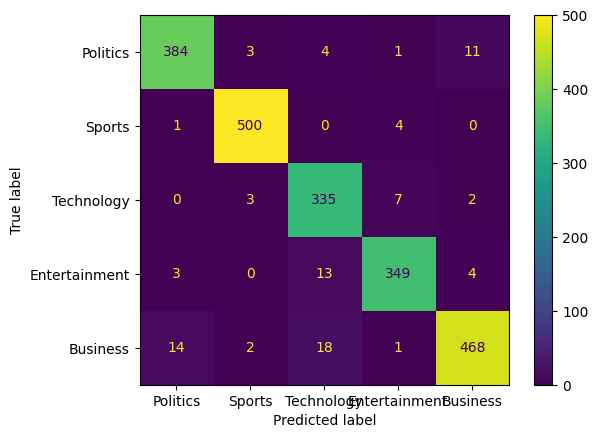

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clustered_data['Actual Category'].unique())
disp.plot();

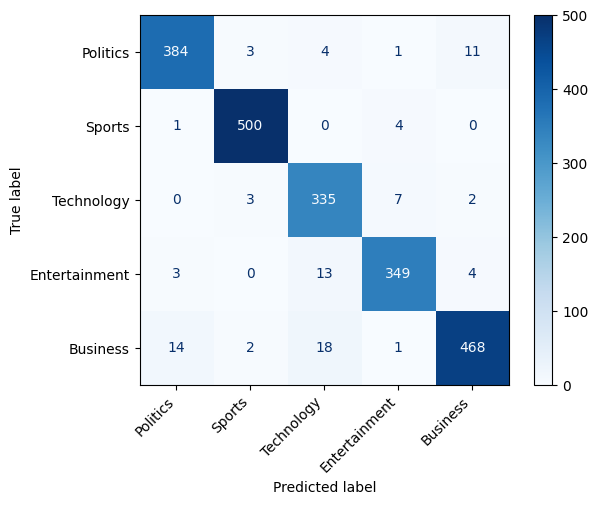

In [ ]:
import matplotlib.pyplot as plt
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=clustered_data['Actual Category'].unique()
)
ax = disp.plot(cmap="Blues").ax_

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.show()


In [ ]:
incorrect_category_data = clustered_data[clustered_data['Actual Category'] != clustered_data['Category']].copy()
incorrect_category_data.shape

(91, 4)

In [ ]:
incorrect_category_data.head()

,Text,cluster,Category,Actual Category
24,"'Hitler' row over Welsh arts cash\n \n An artist critical of Welsh arts funding being brought under assembly government control has denied comparing the idea with dictatorships in Russia and Germany.\n \n Shani Rhys James is worried that the Arts Council of Wales may be taken over by the Welsh Assembly Government. Culture Minister Alun Pugh said it would be ""crass and ignorant"" to liken a quango review to Hitler's Germany. But Ms James emphasised she had actually said artists needed freedom. The future of the Arts Council of Wales has been in question since it was announced that most Welsh quangos would eventually be abolished.\n \n It was announced last July that three Welsh quangos, education and training body Elwa, the Wales Tourist Board and the Welsh Development Agency, would be brought under assembly government control. The Arts Council of Wales may be among the next to come under the assembly government's umbrella. But Ms James, who won the Â£30,000 Jerwood painting prize in 2003, said arts funding should be separate from government. Ms James told BBC Radio Wales: ""It's quite dangerous when you involve politicians because it's not like the health service and it's not like the railways. ""Free expression is absolutely vital in a democratic society. You need distance, you do not need government interference because it could be taken the wrong way.""\n \n But she said reports that she had likened the assembly government to totalitarian regimes were inaccurate.\n \n She told Good Morning Wales: ""Just to put the record straight, that business in the paper where it said I likened the government to Bolshevik Russia or Hitler's Germany, the actual quote I gave was: 'It is vital to a civilised society that we allow artists to express themselves without government control'. ""As we know from past European history, i.e. Russia and Germany in the early 20th Century, artists will go underground or leave the country or rather than compromise their expression'. ""Artists need a free voice to express themselves - they reflect a truth through their own art forms.'"" She said the assembly government was not best placed to run the arts in Wales.\n \n She added: ""It would be a momentous change and devastating to the arts. It would set the arts scene back 60 years, because I really don't think the government has the expertise. ""If you have the National Assembly taking control, I fear you are going to be going back to the dragons and leeks and the choirs.\n \n ""Wales has moved on. It is international now. It is not set back in How Green Was My Valley?"" Responding to Ms James' criticisms, Mr Pugh said: ""The structure of unelected quangos is under review and we have made it clear that further announcements are due shortly. ""Comparing the Welsh Assembly Government to Hitler's Germany is a crass and ignorant response to a real issue about democratic accountability."" Ms James, whose father was Welsh, was born in Melbourne where her parents worked in the theatre. She moved to Powys nearly 20 years ago where she works from her studio near Llangadfan. She has won a number of arts prizes including the Wales Open in 1989 and the Mostyn Open in 1991.\n",2,Entertainment,Politics
34,"Final hunts held as ban looms\n \n Hunts in England and Wales have begun on the last day that hunting with dogs is legal, with more due out later.\n \n Thousands of supporters are expected to turn out at more than 250 meets, many of which have altered their normal schedules to be out on a Thursday. The ban on hunting with dogs comes into effect from 0001 GMT on Friday. The Countryside Alliance had its latest legal bid to block the ban thwarted on Wednesday when the Appeal Court ruled the Hunting Act was lawful.\n \n But the group says hunting will continue in some form after the ban comes in, with hunts expected to test the new law to its limits. Others are expected to defy the ban by continuing to hunt illegally.\n \n An

In [ ]:
embedding_matrix[24].reshape(1,-1)

array([[-3.89091857e-02,  3.27571668e-02,  1.84364337e-03,
        -5.83081087e-03,  6.01676032e-02,  3.99839170e-02,
         8.35593268e-02, -1.18345410e-01, -7.76456296e-02,
         4.64428216e-02, -2.95266137e-02, -5.02616912e-02,
         3.04022189e-02,  5.74795790e-02,  3.51721421e-02,
         7.98467249e-02, -3.60404365e-02, -7.27961063e-02,
        -4.79112789e-02,  2.51296367e-02,  5.57574034e-02,
         4.45612445e-02,  5.79392575e-02, -5.19735273e-03,
         6.96285740e-02, -6.41645044e-02, -1.78565383e-02,
         7.70377554e-03,  3.61743011e-02, -4.64322977e-03,
        -2.12844107e-02,  2.84408238e-02, -3.08641829e-02,
        -3.74556854e-02,  1.10003576e-01,  9.07790586e-02,
         5.40992953e-02, -1.71863735e-02, -6.01414219e-02,
        -3.79346758e-02, -1.19600765e-01,  9.33201704e-03,
        -8.53837878e-02, -4.68648709e-02,  2.57740617e-02,
         6.91596372e-03,  2.29996890e-02,  1.78320911e-02,
        -1.18079752e-01, -3.21984291e-02, -4.43797326e-0

In [ ]:
kmeans.cluster_centers_[[2]]

array([[-1.04431231e-02, -4.30864953e-02, -1.62626076e-02,
        -2.45876871e-02,  1.68980416e-02,  4.69358377e-02,
         4.19716910e-02,  8.88395682e-03,  1.32638002e-02,
        -1.04076127e-02, -2.22940147e-02, -1.37507115e-02,
         1.97701622e-02,  1.27869993e-02,  2.73735635e-03,
         7.39200367e-03,  4.07768860e-02, -2.11774260e-02,
        -1.97053086e-02,  6.95258379e-04, -2.27751443e-03,
        -3.76571622e-03,  5.05973445e-03, -4.74088266e-03,
        -8.69745016e-03, -2.58635525e-02, -2.06833296e-02,
        -4.78407554e-03, -3.27619240e-02, -3.24198417e-03,
         1.13380505e-02,  2.14789733e-02, -3.46701592e-02,
        -1.39540192e-02, -1.19951498e-02,  7.28388689e-03,
        -3.83113883e-03,  6.35841209e-03, -4.27266955e-02,
        -1.10604325e-02,  7.16871535e-03, -1.61167271e-02,
        -2.78127827e-02, -1.22194989e-02,  2.17279550e-02,
        -4.04962152e-02,  1.37342457e-02, -2.24780347e-02,
        -8.48784018e-03,  1.32654458e-02, -2.65153553e-0

In [ ]:
idx = 24

print('Distance from Actual Category')
print(cdist(embedding_matrix[idx].reshape(1,-1), kmeans.cluster_centers_[[2]], "euclidean")[0,0])

print('Distance from Predicted Category')
print(cdist(embedding_matrix[idx].reshape(1,-1), kmeans.cluster_centers_[[3]], "euclidean")[0,0])

Distance from Actual Category
0.9545187652210279
Distance from Predicted Category
1.0357046825280756


In [ ]:
idx = 45

print('Distance from Actual Category')
print(cdist(embedding_matrix[idx].reshape(1,-1), kmeans.cluster_centers_[[2]], "euclidean")[0,0])

print('Distance from Predicted Category')
print(cdist(embedding_matrix[idx].reshape(1,-1), kmeans.cluster_centers_[[4]], "euclidean")[0,0])

Distance from Actual Category
1.019115605584521
Distance from Predicted Category
1.0080196953598326
